<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [20]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import LdaMulticore
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from gensim import corpora
import re
import gensim

In [5]:
def tokenize(doc):
    
    return [token for token in simple_preprocess(doc, deacc=True, min_len=4, max_len=20) if token not in STOPWORDS]

In [6]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [7]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, al..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[came, lunch, togo, service, quick, staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[vegas, dozens, times, stepped, foot, circus, ..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[went, night, closed, street, party, best, act..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[stars, price, lunch, seniors, eating, food, s..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [8]:
vectobj = TfidfVectorizer(stop_words = 'english')

vectmx = vectobj.fit_transform(yelp.text.values)

vectmx_df = pd.DataFrame(vectmx.todense(), columns=vectobj.get_feature_names())

vectmx_df.head()

,00,000,001695,007,00a,00am,00ish,00pm,01,011802,...,誰も乗車しなくても,豆腐花,質問にも丁寧に答えてくれましたし,車好きさんには,這是一個不錯的選擇,運転しない,運転中も英語で指導があります,食べ物はうまい,餐後點了甜點,３時間後の便
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

model.fit(vectmx_df)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [10]:
fakerev = ['I really hate this pizza place. I wish it was better!']

In [11]:
fakerev_transform = vectobj.transform(fakerev)
_, topics = model.kneighbors(fakerev_transform.todense())

similar_topics = [yelp.text[t] for t in topics]
print(similar_topics)

[9325    This is a great place for pizza. We love their...
4769    I hate chains.  I want to hate this place so b...
9571    Not really much to say...basic pizza for super...
616     This place sucked even more the second time I ...
8571    Pizza was really good, fresh ingredients, over...
Name: text, dtype: object]


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [12]:
model2 = SGDClassifier(random_state=42)


pipe = Pipeline([('vect', vectobj),           
                  ('sgdc', model2)])

parameters = { 
    'vect__max_df': (0.1, 0.99),
    'vect__min_df': (.02, .06),
    'vect__max_features': ( 100, 500, 1000),
    'sgdc__max_iter': (300, 1000),
}

clf = GridSearchCV(pipe, parameters, cv=5, n_jobs=-1)


clf.fit(yelp['text'], yelp['stars'])

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                          

In [13]:
print(f'Best Score for Classifier: {clf.best_score_}')

Best Score for Classifier: 0.5893


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [14]:
word = corpora.Dictionary(yelp['tokens'])
len(word.keys())

24967

In [15]:
word.filter_extremes(no_below=5, no_above=0.90)
len(word.keys())

6981

In [18]:
corpus = [word.doc2bow(tokens) for tokens in yelp['tokens']]
dir(gensim)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_matutils',
 'corpora',
 'interfaces',
 'logger',
 'logging',
 'matutils',
 'models',
 'parsing',
 'scripts',
 'similarities',
 'summarization',
 'topic_coherence',
 'utils']

In [21]:
lda = LdaMulticore(corpus=corpus,
                   id2word=word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

In [22]:
words = [re.findall(r'"([^"]*)"', t[1]) for t in lda.print_topics()]
topics = [' '.join(t[0:5]) for t in words]

for i, x in enumerate(topics):
    print(f"------ Topic {i} -----")
    print(x, end="\n\n")

------ Topic 0 -----
good food place service time

------ Topic 1 -----
place great good time like

------ Topic 2 -----
great food place good like

------ Topic 3 -----
great place service food good

------ Topic 4 -----
food service great time good

------ Topic 5 -----
place good food like service

------ Topic 6 -----
food good great like place

------ Topic 7 -----
food good place service great

------ Topic 8 -----
place good food great time

------ Topic 9 -----
food good like great time



In [23]:
from collections import Counter

alltopics = [topic.split() for topic in topics]
topicslist = [item for sublist in alltopics for item in sublist]

In [24]:
counttopics = Counter(topicslist)

In [25]:
topicsdf = pd.DataFrame(counttopics.keys(),counttopics.values()).reset_index()
topicsdf.columns = ['no_of_items','topic']

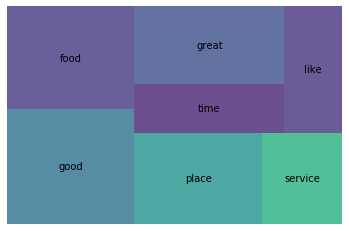

In [28]:
#visualizations
import squarify
import matplotlib.pyplot as plt

squarify.plot(sizes=topicsdf['no_of_items'], label=topicsdf['topic'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)